# Feed Forward Neural Networks

The goal of this notebook is to become familiar with a basic Neural Network architecture, the Feed-Forward Neural Network (FFNN). 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD

---------
## 1. Review of the Neural Network anatomy  


#### Input, Hidden Layers, and Output Layers

The **forward** pass through an FFNN is a sequence of linear and nonlinear operations.



<img src="figs/ffnn.png" width="70%"/>

The nonlinear function is the **Activation function**. A list of activation functions can be found [here](https://en.wikipedia.org/wiki/Activation_function).

Remember a FFNN performs a linear transformation of the data using learned weights, and then passes this linear transformation through a nonlinear function known as an **activation function**.

One choice of an activation function is the *sigmoid* function which is defined as $$\sigma(x)=\frac{1}{1+e^{-z}}$$

Remember this is the same as logistic regression!

<img src="figs/sigmoid_activation.png" width="30%"/>

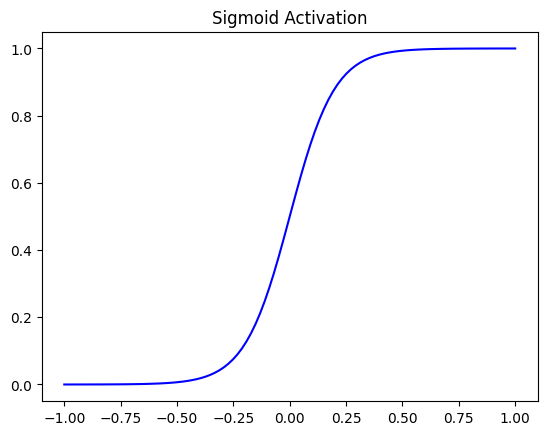

In [2]:
# Define sigmoid activation function
def sig(z):
    return 1 / (1 + np.exp(-z))


# Input vector
x_train = np.linspace(-1, 1, 100)

# We'll set the network parameters
w1, b1 = 10, 0
w2, b2 = 1, 0

# Linear operation
l1 = w1 * x_train + b1

# Sigmoid activation
h = sig(l1)

# Output layer
y_train = w2 * h + b2

plt.plot(x_train, y_train, "-b")
plt.title("Sigmoid Activation")
plt.show()

Another common choice of an activation function is the *Rectified Linear Unit* (ReLU) function defined as $$g(x)=\max(0,x)$$


<img src="figs/relu_activation.png" width="30%"/>

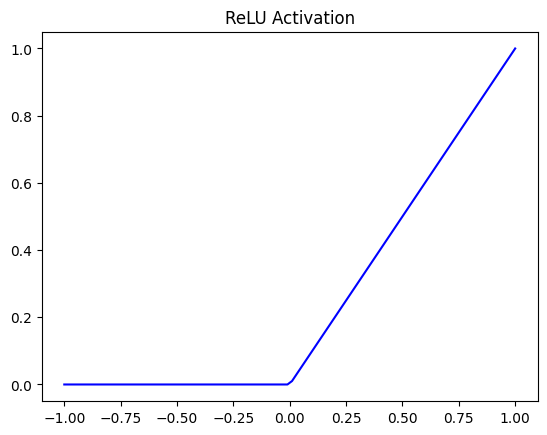

In [3]:
# Define ReLU activation function
def g(z):
    return np.maximum(0, z)


# Input vector
x_train = np.linspace(-1, 1, 100)

# We'll set the network parameters
w1, b1 = 1, 0.0
w2, b2 = 1, 0

# Linear operation
l1 = w1 * x_train + b1

# RELU activation
h = g(l1)

# Output layer
y_train = w2 * h + b2

plt.plot(x_train, y_train, "-b")
plt.title("ReLU Activation")
plt.show()

## 2. TensorFlow and Keras

**Keras, Sequential:** [Source]
(https://keras.io/models/sequential/)


There are many powerful deep learning packages to work with neural networks like **TensorFlow** and **PyTorch**. These packages provide both the forward and back propagations, and many other other functionalities. The forward pass is used to make   predictions while the backward (back propagation)  is used to  train (optimize) a network. Training means  to find the optimal parameters for a specific task.

Here, we use TensorFlow (TF) and Keras to employ FFNN.

#### Import the toy dataset

In [4]:
data = pd.read_csv("dataset.csv")

data.head()

,x,y
0,-1.000000,0.505988
1,-0.959184,0.479407
2,-0.918367,0.504377
3,-0.877551,0.485530
4,-0.836735,0.550247


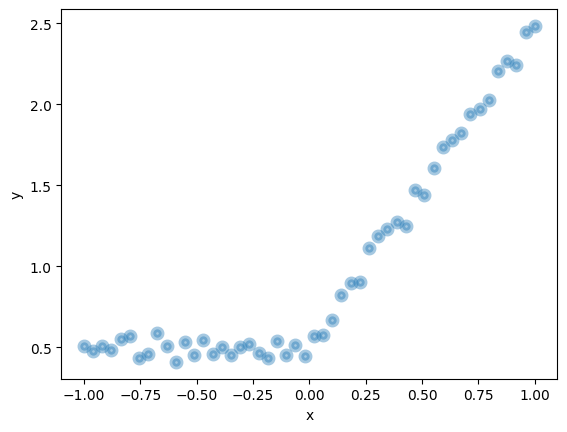

In [5]:
# Let's see what this data we are trying to predict looks like
X = data["x"]
y = data["y"]

# Plot
plt.scatter(X, y, alpha=0.4, lw=4)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Use Keras to build a FFNN
Below we will use the Keras package to first define a FFNN model. We will then use the add method to add a single hidden layer to the model with one neuron using ReLU activation.

In [6]:
model = models.Sequential(name="Single_Neuron_Model")

# Input layer, one neuron
model.add(layers.Input(shape=(1,)))

# Hidden layer with one neuron
model.add(layers.Dense(1, activation="relu"))

# Output layer with one neuron
model.add(layers.Dense(1, activation="linear"))

model.summary()

Model: "Single_Neuron_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


At this point, we haven't trained the neural network yet, it is just initialized with random weights.

16/16 [==============================] - 0s 520us/step


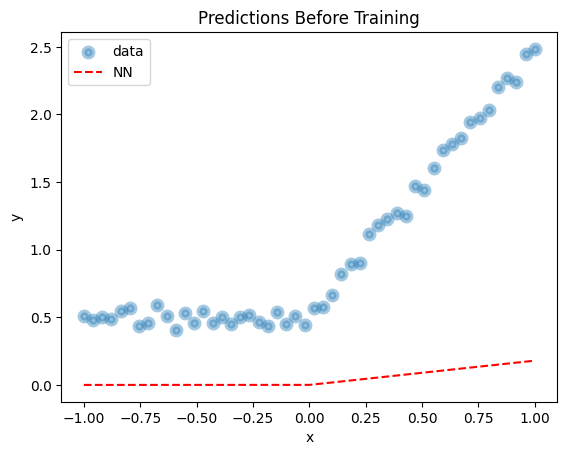

In [7]:
# Make predictions on the untrained network
x_lin = np.linspace(X.min(), X.max(), 500)
y_hat = model.predict(x_lin)

# Plot
plt.scatter(X, y, alpha=0.4, lw=4, label="data")
plt.plot(x_lin, y_hat, label="NN", ls="--", c="r")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Predictions Before Training")
plt.legend()
plt.show()

We'll let back propogation and stochastic gradient descent take it from here.

The **backward** pass is the training. This part is fairly math heavy -- it is based on the chain rule of calculus, and it calculates the gradient of the loss w.r.t. the weights. This gradient is used by the optimizer to update the weights to minimize the loss function.

<img src="figs/dl.jpg" width="70%"/>

#### Compiling the NN

`compile` is used to configure a NN model so it can be fit. We aren't ready to fit just yet, but we are compiling here because doing so reinitilizes the model weights.

`model.compile(optimizer, loss, metrics, **kwargs)`

`optimizer` - defines how the weights are updated (we'll use SGD)\
`loss` - what the model is trying to minimize\
`metric` - list of metrics to report during training process

In [8]:
model.compile(optimizer=SGD(learning_rate=1e-1), loss="mse", metrics=[])

#### Fitting the NN

`Model.fit(x=None, y=None, batch_size=None, epochs=1, verbose="auto", validation_split=0.0, validation_data=None, shuffle=True, **kwargs)`

`batch_size` - number of observations overwhich the loss is calculated before each weight update\
`epochs` - number of times the complete dataset is seen in the fitting process\
`verbose` - you can silence the training output by setting this to `0`\
`validation_split` - splits off a portion of the `x` and `y` training data to be used as validation (see warning below)\
`validation_data` - tuple designating a seperate `x_val` and `y_val` dataset\
`shuffle` - whether to shuffle the training data before each epoch

We fit the model for 100 `epochs` and set `batch_size` to 64. The results of `fit()` are then stored in a variable called `history`.  

In [9]:
# Fit model and store training histry
history = model.fit(X, y, epochs=200, batch_size=64, verbose=1)

Epoch 1/200
1/1 [==============================] - 0s 220ms/step - loss: 1.2795
Epoch 2/200
1/1 [==============================] - 0s 2ms/step - loss: 0.8572
Epoch 3/200
1/1 [==============================] - 0s 2ms/step - loss: 0.5837
Epoch 4/200
1/1 [==============================] - 0s 2ms/step - loss: 0.4052
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2883
Epoch 6/200
1/1 [==============================] - 0s 3ms/step - loss: 0.2122
Epoch 7/200
1/1 [==============================] - 0s 3ms/step - loss: 0.1627
Epoch 8/200
1/1 [==============================] - 0s 2ms/step - loss: 0.1303
Epoch 9/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1086
Epoch 10/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0935
Epoch 11/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0825
Epoch 12/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0739
Epoch 13/200
1/1 [==============================] - 0s 3ms/

#### Plot Training History

`history.history` is a dictionary which contains information from each training epoch (no, I don't know the rationale behind the double name). Use it to plot the loss across epochs.

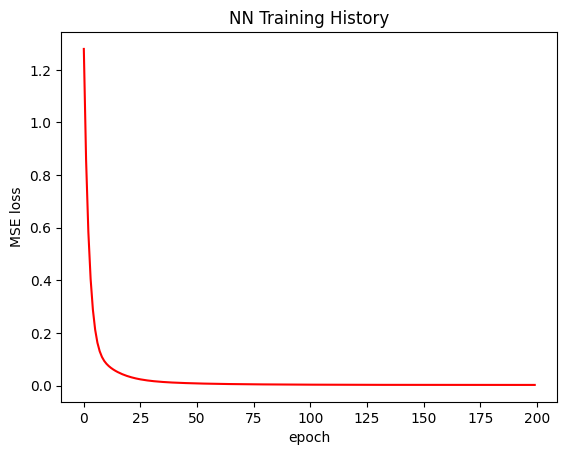

In [10]:
# Plot training history
plt.plot(history.history["loss"], c="r")
plt.ylabel("MSE loss")
plt.xlabel("epoch")
plt.title("NN Training History")
plt.show()

In [11]:
# Weights learned for the data
model.get_weights()

[array([[1.6155641]], dtype=float32),
 array([0.02496681], dtype=float32),
 array([[1.2113447]], dtype=float32),
 array([0.49029088], dtype=float32)]

#### Predict & Plot

We use the model's `predict` method on a linspace, `x_lin`, which we construct to span the range of the dataset's $x$ values. We save the resulting predictions in `y_hat`

16/16 [==============================] - 0s 547us/step


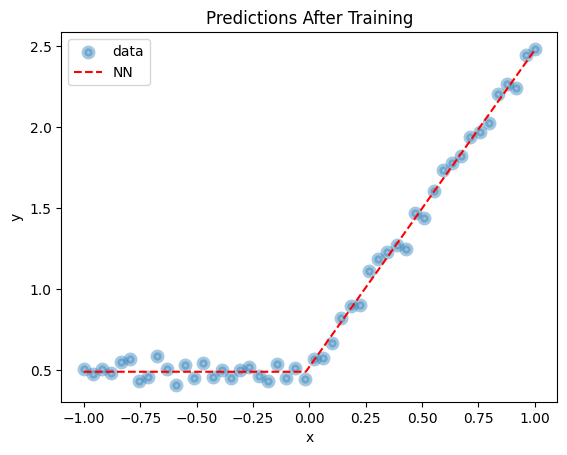

In [12]:
# Predict
x_lin = np.linspace(X.min(), X.max(), 500)
y_hat = model.predict(x_lin)

# Plot
plt.scatter(X, y, alpha=0.4, lw=4, label="data")
plt.plot(x_lin, y_hat, label="NN", ls="--", c="r")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Predictions After Training")
plt.legend()
plt.show()

#### An Ugly Function

Let's try using the same NN to approximate this beauty.

In [13]:
def ugly_function(x):
    if x < 0:
        return np.exp(-(x**2)) / 2 + 1 + np.exp(-((10 * x) ** 2))
    else:
        return np.exp(-(x**2)) + np.exp(-((10 * x) ** 2))

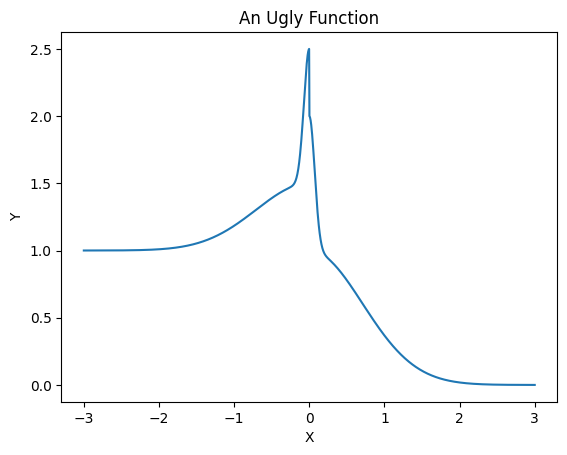

In [14]:
# Generate data
x_ugly = np.linspace(-3, 3, 1500)  # create x-values for input
y_ugly = np.array(list(map(ugly_function, x_ugly)))

# Plot data
plt.plot(x_ugly, y_ugly)
plt.title("An Ugly Function")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Epoch 1/100
24/24 [==============================] - 0s 642us/step - loss: 0.5459
Epoch 2/100
24/24 [==============================] - 0s 493us/step - loss: 0.0759
Epoch 3/100
24/24 [==============================] - 0s 481us/step - loss: 0.0682
Epoch 4/100
24/24 [==============================] - 0s 495us/step - loss: 0.0653
Epoch 5/100
24/24 [==============================] - 0s 468us/step - loss: 0.0640
Epoch 6/100
24/24 [==============================] - 0s 410us/step - loss: 0.0635
Epoch 7/100
24/24 [==============================] - 0s 366us/step - loss: 0.0634
Epoch 8/100
24/24 [==============================] - 0s 396us/step - loss: 0.0638
Epoch 9/100
24/24 [==============================] - 0s 369us/step - loss: 0.0636
Epoch 10/100
24/24 [==============================] - 0s 372us/step - loss: 0.0631
Epoch 11/100
24/24 [==============================] - 0s 361us/step - loss: 0.0633
Epoch 12/100
24/24 [==============================] - 0s 409us/step - loss: 0.0633
Epoch 13/100


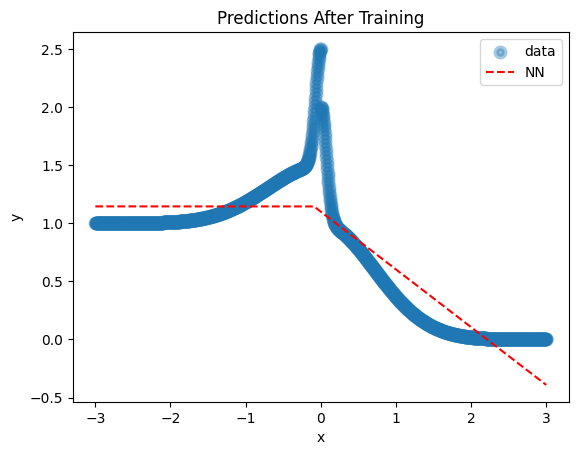

In [15]:
# Compile the model
model.compile(optimizer=SGD(learning_rate=1e-1), loss="mse", metrics=[])

# Fit model and store training histry
history = model.fit(x_ugly, y_ugly, epochs=100, batch_size=64, verbose=1)

# Predict
x_lin = np.linspace(x_ugly.min(), x_ugly.max(), 500)
y_hat = model.predict(x_lin)

# Plot
plt.scatter(x_ugly, y_ugly, alpha=0.4, lw=4, label="data")
plt.plot(x_lin, y_hat, label="NN", ls="--", c="r")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Predictions After Training")
plt.legend()
plt.show()

We're going to need a bigger model...

Here we will build a FFNN with two hidden layers containing 16 neurons each.

In [16]:
model = models.Sequential(name="Multiple_Neuron_Model")

# Input layer, one neuron
model.add(layers.Input(shape=(1,)))

# Hidden layer 1 with sixteen neurons
model.add(layers.Dense(32, activation="relu"))

# Hidden layer 2 with sixteen neurons
model.add(layers.Dense(32, activation="relu"))

# Output layer with one neuron
model.add(layers.Dense(1, activation="linear"))

model.summary()

Model: "Multiple_Neuron_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                64        
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
24/24 [==============================] - 0s 700us/step - loss: 0.1536
Epoch 2/100
24/24 [==============================] - 0s 631us/step - loss: 0.0318
Epoch 3/100
24/24 [==============================] - 0s 565us/step - loss: 0.0217
Epoch 4/100
24/24 [==============================] - 0s 450us/step - loss: 0.0183
Epoch 5/100
24/24 [==============================] - 0s 709us/step - loss: 0.0167
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 7/100
24/24 [==============================] - 0s 953us/step - loss: 0.0148
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0140
Epoch 9/100
24/24 [==============================] - 0s 431us/step - loss: 0.0137
Epoch 10/100
24/24 [==============================] - 0s 393us/step - loss: 0.0131
Epoch 11/100
24/24 [==============================] - 0s 390us/step - loss: 0.0131
Epoch 12/100
24/24 [==============================] - 0s 405us/step - loss: 0.0123
Epoch 13/100
24/2

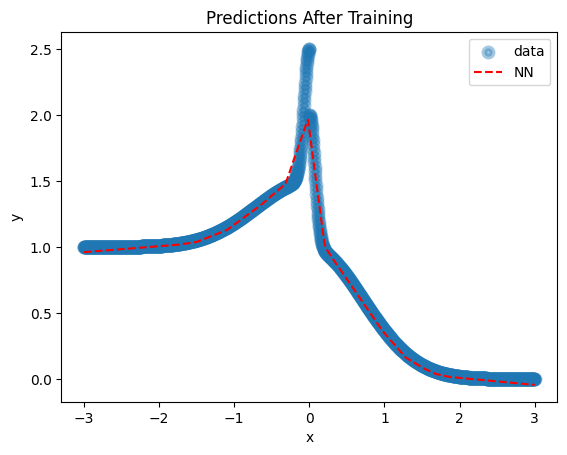

In [17]:
# Compile the model
model.compile(optimizer=SGD(learning_rate=1e-1), loss="mse", metrics=[])

# Fit model and store training histry
history = model.fit(x_ugly, y_ugly, epochs=100, batch_size=64, verbose=1)

# Predict
x_lin = np.linspace(x_ugly.min(), x_ugly.max(), 500)
y_hat = model.predict(x_lin)

# Plot
plt.scatter(x_ugly, y_ugly, alpha=0.4, lw=4, label="data")
plt.plot(x_lin, y_hat, label="NN", ls="--", c="r")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Predictions After Training")
plt.legend()
plt.show()

## 3. PyTorch Implementation: Extra Material

PyTorch is another library used to build, train, and deploy deep learning models. I think Tensorflow / Keras is more intuitive, but PyTorch is the industry standard for most NN problems.

A great PyTorch tutorial for an FFNN implementation can be found at: https://docs.pytorch.org/tutorials/beginner/basics/intro.html